In [1]:
!pip install -Uqq fastai duckduckgo_search

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastapi-cli 0.0.4 requires typer>=0.12.3, but you have typer 0.9.4 which is incompatible.
gradio 4.32.1 requires typer<1.0,>=0.12; sys_platform != "emscripten", but you have typer 0.9.4 which is incompatible.


In [2]:
from duckduckgo_search import AsyncDDGS
from fastcore.all import *

async def search_images(term,max_images = 30):
    print(f"Searching for {term}")
    results = AsyncDDGS().images(keywords = term, region = 'wt-wt',safesearch = 'off',max_results = max_images)
    return L(results).itemgot('image')

In [3]:
results = await search_images("grizzly bear", max_images = 1)
print(results)

Searching for grizzly bear
['http://2.bp.blogspot.com/-NjMTuklENdE/UHzVv_8dIxI/AAAAAAAAA-U/tNBsQDn8kFI/s1600/Grizzly+Bear+Pic.jpg']


In [4]:
from fastdownload import download_url
dest = 'grizzlybear.jpg'
download_url(results[0], dest)



Path('grizzlybear.jpg')

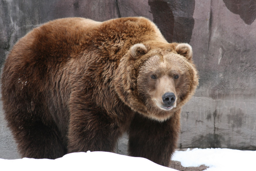

In [5]:
from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(265,256)

In [6]:
results = await search_images("black bear", max_images = 1)
print(results[0])

Searching for black bear
https://www.worldatlas.com/upload/58/e7/a4/thinkstockphotos-177804726.jpg


In [7]:
dest = "blackbear.jpg"
download_url(results[0],dest)

Path('blackbear.jpg')

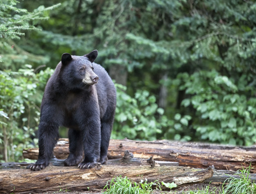

In [8]:
im = Image.open(dest)
im.to_thumb(256,256)

In [9]:
results = await search_images("teddy bear", max_images = 1)
print(results)

Searching for teddy bear
['https://i5.walmartimages.com/asr/8baa3751-0658-4aa5-8b68-89c73841e754_1.119af20f942cfb2e8e9d024424b41dba.jpeg']


In [10]:
dest = "teddybear.jpg"
download_url(results[0], dest)

Path('teddybear.jpg')

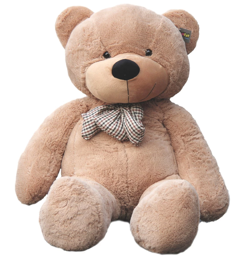

In [11]:
im = Image.open(dest)
im.to_thumb(256,256)

In [12]:
searches = 'Grizzly bear','black bear','teddy bear'
path = Path('Bears')
from time import sleep

for i in searches:
    dest = (path/i)
    dest.mkdir(exist_ok = True, parents = True)
    download_images(dest, urls = (await search_images(f"{i}")))
    sleep(10)



Searching for Grizzly bear
Searching for black bear
Searching for teddy bear


In [13]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

6

In [14]:
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct =0.2, seed=42),
    get_y = parent_label,
    item_tfms = RandomResizedCrop(224, min_scale=0.5),
    batch_tfms = aug_transforms()
).dataloaders(path, bs=32)

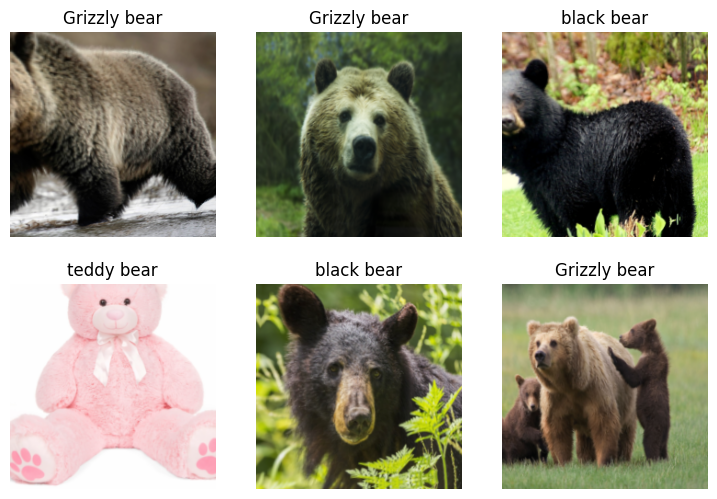

In [15]:
dls.show_batch(max_n=6)

In [16]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.307004,0.091766,0.021739,00:46


epoch,train_loss,valid_loss,error_rate,time
0,0.225344,0.014683,0.000000,00:46
1,0.131341,0.001487,0.000000,00:46
2,0.088195,0.000788,0.000000,00:43
3,0.068343,0.000459,0.000000,00:41


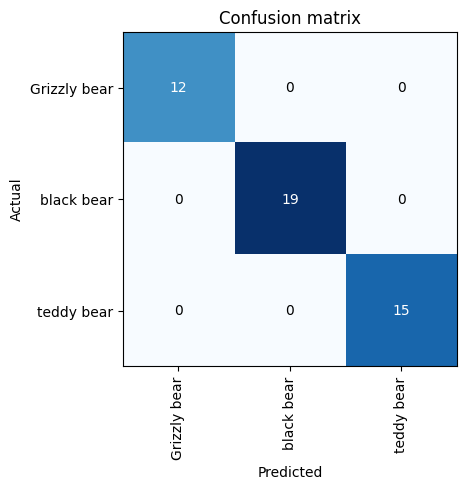

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

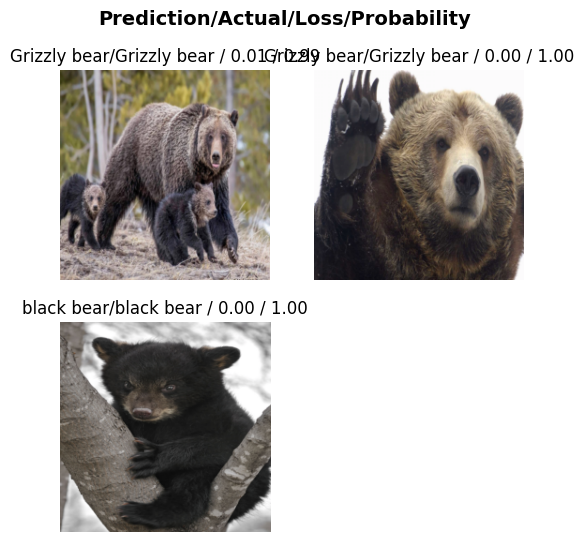

In [18]:
interp.plot_top_losses(3,nrows=2)

In [19]:
from fastai.vision.widgets import ImageClassifierCleaner

In [20]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [21]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [22]:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)